In [2]:
import json
import pandas as pd 
import numpy as np
import os
import re

In [7]:
# Put data under /data/gpt_annotations
path = '../data/gpt_annotations/'
for root, folders, files in os.walk(path):
    folder_list = folders
    break

In [8]:
folders

['gpt_generation_quantifiers_numerals',
 'gpt_generation_tense_agreemen',
 'gpt_generation_reference_word',
 'gpt_generation_numbers_agreemen',
 'gpt_generation_speech_acts',
 'gpt_generation_subject_verb_agreemen',
 'gpt_generation_modal_verbs_expressions',
 'gpt_generation_noun_verb_collocation']

In [27]:
path_mapping = {'gpt_generation_quantifiers_numerals': "Quantifiers Numerals",
                'gpt_generation_tense_agreemen': "Tense Agreement",
                'gpt_generation_reference_word': "Reference Word",
                'gpt_generation_numbers_agreemen': "Numbers Agreement",
                'gpt_generation_speech_acts': "Speech Acts",
                'gpt_generation_subject_verb_agreemen': "Subject Verb Agreement",
                'gpt_generation_modal_verbs_expressions': "Modal Verbs Expressions",
                'gpt_generation_noun_verb_collocation': "Noun Verb Collocation"}

In [79]:
import os
import pandas as pd
import re


# put the data under /data/gpt_annotations
pattern = r"([^/]+)_dialog$"

feature = folders[3]
path = f'../data/gpt_annotations/{feature}'
all_data = pd.DataFrame()
count = 0

for root, _, files in os.walk(path):
    if count == 0:
        count = count+1
        continue 
    language = re.search(pattern, root).group(1)
    for json_file in files:
        if json_file.endswith('.json'):
            file_path = os.path.join(root, json_file)
            try:
                data = pd.read_json(file_path)
                filename = os.path.splitext(json_file)[0]
                data['source_file'] = filename
                data['language'] = language
                all_data = pd.concat([all_data, data], ignore_index=True)
            except ValueError as e:
                print(f"Error reading {file_path}: {e}")
    count = count + 1

In [80]:
if feature in ['gpt_generation_reference_word',
               'gpt_generation_numbers_agreemen',
               'gpt_generation_modal_verbs_expressions',
               'gpt_generation_noun_verb_collocation']:
    all_data['token_num'] = 1
else:
    all_data['token_num'] = all_data['annotation_token'].apply(lambda x: len(x))
counts = all_data.groupby(['language', 'source_file'])['token_num'].sum().reset_index()

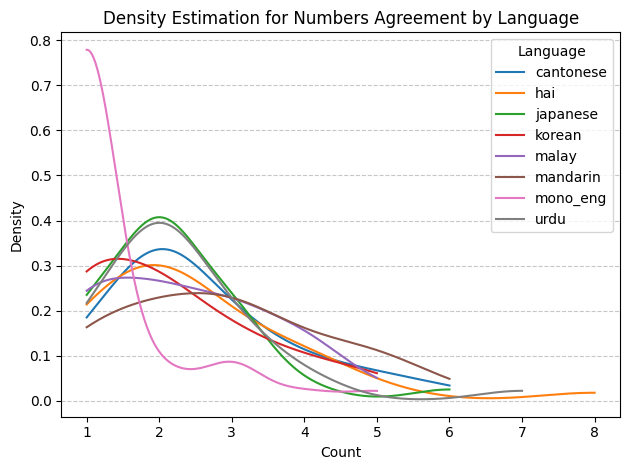

In [82]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

languages = counts['language'].unique()

for language in languages:
    lang_counts = counts[counts['language'] == language]['token_num']
    density = gaussian_kde(lang_counts)
    x_vals = np.linspace(min(lang_counts), max(lang_counts), 1000)
    y_vals = density(x_vals)
    plt.plot(x_vals, y_vals, label=language)
    
plt.title(f'Density Estimation for {path_mapping[feature]} by Language')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend(title="Language")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()